In [1]:
# http://ina17.hatenablog.jp/?page=1512044903
%matplotlib inline
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
group1 = range(5)
group2 = range(5,10)

node_color = ["b"] * 5
node_color.extend(["r"] * 5)

g = nx.Graph()
g.add_nodes_from(group1, bipartite=1)
g.add_nodes_from(group2, bipartite=0)

for (i,j) in itertools.product(group1, group2):
    val = np.random.randint(1, 10)
    g.add_edge(i, j, weight=val)

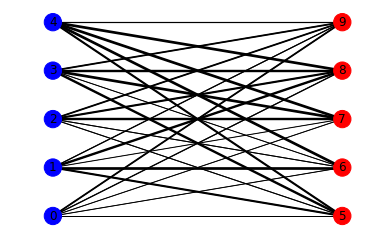

In [3]:
A,B = bipartite.sets(g)
pos = dict()
pos.update((n,(1,i)) for i,n in enumerate(A))
pos.update((n,(2,i)) for i,n in enumerate(B))

edge_width = [ d['weight']*0.3 for (u,v,d) in g.edges(data=True)]

nx.draw_networkx(g, pos, node_color=node_color)
nx.draw_networkx_edges(g, pos, width=edge_width)
plt.axis("off")
plt.show()

In [4]:
d = nx.max_weight_matching(g)

for (i, j) in list(g.edges()):
    if (i, j) not in d:
        if (j, i) not in d:
            g.remove_edge(i,j)

edge_width = [ d['weight']*0.3 for (u,v,d) in g.edges(data=True)]

nx.draw_networkx(g, pos, node_color=node_color)
nx.draw_networkx_edges(g, pos, width=edge_width)
plt.axis("off")
plt.show()